# Dimensionality Reduction<br>
**Overview**<br>
1. PCA
    *  Load MNIST dataset
    *  Split into train and test sets
    *  Train Random Forest classifier on train set, time how long it takes, and evaluate on test set
    *  Use PCA to reduce data dimensionality with explained variance at 95%
    *  Train a new Random Forest classifier on the reduced dataset and see how long it takes
    *  How does it compare to the previous classifier?
<br><br>
2. Other Algorithms
    *  Use t-SNE to reduce MNIST dataset down to 2 dimensions and plot the result
    *  Try other dimensionality reduction algorithms: PCA, LLE, Isomap, MDS. Compare visualizations

### PCA

In [217]:
import time

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS, Isomap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

%matplotlib inline
%reset

Nothing done.


# Step 1
**Load dataset**

In [218]:
digits = load_digits()

X = digits['data']
y = digits['target']
print(X.shape)

(1797, 64)


# Step 2
**Split into train and test sets**

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Step 3
**Train RF classifier, time, and evaluate**

In [220]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

ts = time.time()
rf_clf.fit(X_train, y_train)
te = time.time()

print(f'Time: {te-ts} sec')


predictions = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f'Acccurcacy: {accuracy*100}%')


Time: 0.17685794830322266 sec
Acccurcacy: 97.77777777777777%


# Step 4
**Use PCA to reduce data dimensionality with explained variance at 95%**

In [221]:
pca = PCA(n_components=0.95)

X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

rf_clf_new = RandomForestClassifier(n_estimators=100, random_state=42)

ts = time.time()
rf_clf_new.fit(X_train_reduced, y_train)
te = time.time()

print(f'Time: {te-ts} sec')


predictions = rf_clf_new.predict(X_test_reduced)
accuracy = accuracy_score(predictions, y_test)

print(f'Acccurcacy: {accuracy*100}%')

Time: 0.39461612701416016 sec
Acccurcacy: 97.77777777777777%


Why did it take longer? PCA does not always help, it depends on the dataset and model. In this case it makes training slower

### Other Algorithms

# Step 5
**Use t-SNE to reduce MNIST dataset down to 2 dimensions and plot the result**

In [222]:
t_sne = TSNE(n_components=2, random_state=42)
X_reduced_t_sne = t_sne.fit_transform(X)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [223]:

def plot_new_dimensions(X_reduced, y, algorithm_name):
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="gist_rainbow")
    ax = plt.gcf().gca()
    ax.set_title(algorithm_name, fontsize=14, fontweight='bold')

    X_reduced_images = X_reduced[:100]

    for idx, image_coord in enumerate(X_reduced_images):
        image = digits.images[idx]
        imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)

        ax.add_artist(imagebox)



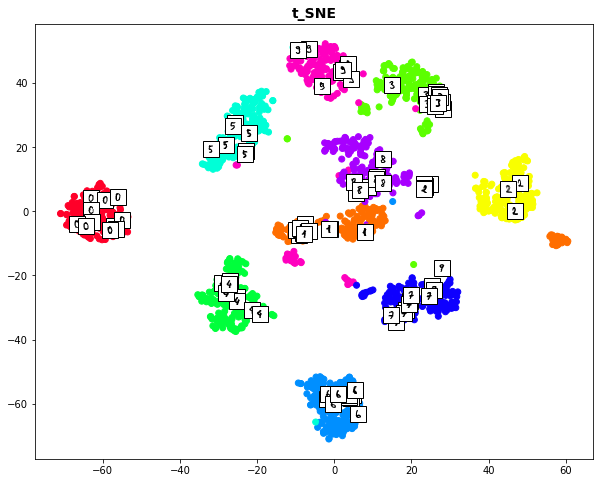

In [224]:
figure(figsize=(10, 8))
plot_new_dimensions(X_reduced_t_sne, y, 't_SNE')

# Step 6
**Use PCA, LLE, Isomap and MDS. Compare visualizations**

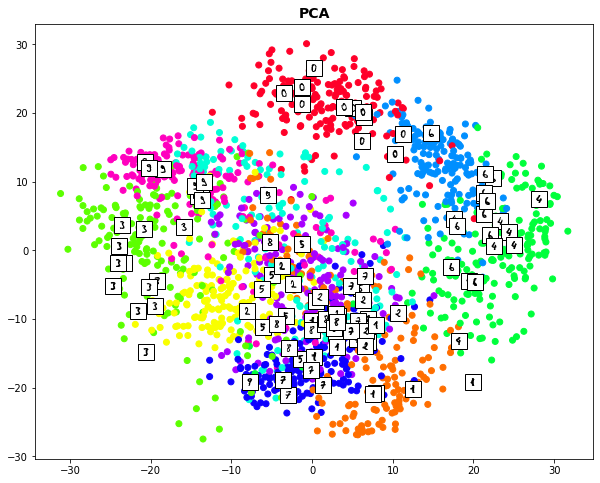

In [225]:
pca = PCA(n_components=2, random_state=42)
X_reduced_PCA = pca.fit_transform(X)

figure(figsize=(10, 8))
plot_new_dimensions(X_reduced_PCA, y, 'PCA')

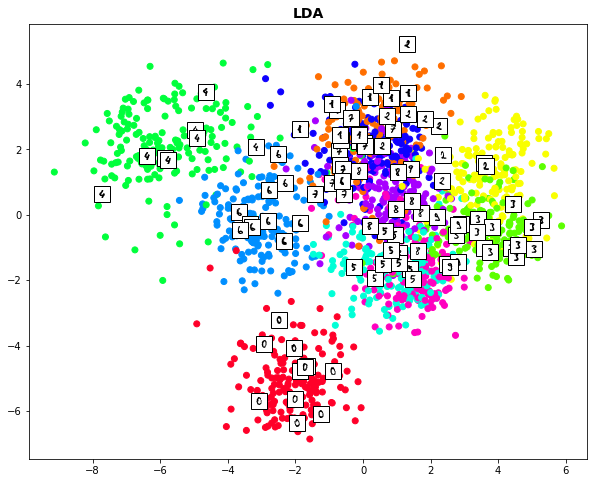

In [226]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_reduced_LDA = lda.fit_transform(X, y)

figure(figsize=(10, 8))
plot_new_dimensions(X_reduced_LDA, y, 'LDA')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:322: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


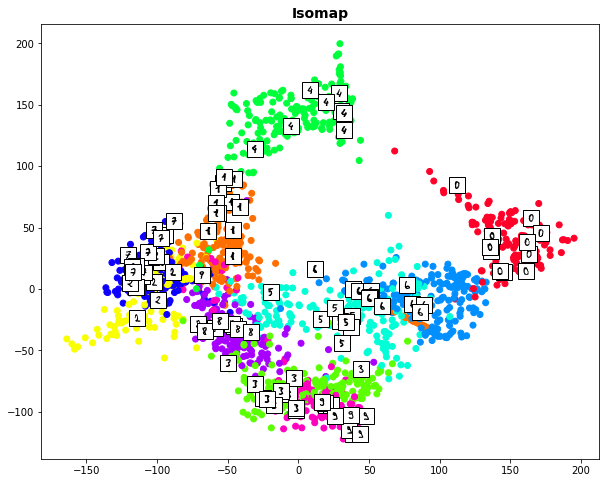

In [227]:
iosmap = Isomap(n_components=2)
X_reduced_Isomap = iosmap.fit_transform(X)

figure(figsize=(10, 8))
plot_new_dimensions(X_reduced_Isomap, y, 'Isomap')

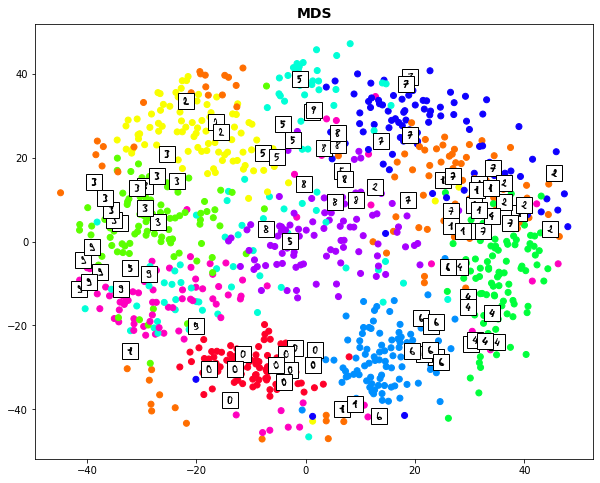

In [228]:
mds = MDS(n_components=2, random_state=42)
X_reduced_MDS = mds.fit_transform(X)

figure(figsize=(10, 8))
plot_new_dimensions(X_reduced_MDS[:1000], y[:1000], 'MDS') # takes too long with full dataset

# Conclusion<br>

It looks like t-SNE gives us the clearest clusters when reduced to 2 dimensions<br>t-SNE reduces dimensionality while keeping similar instances together, which makes it very well suited to visualizeing clusters of instances in high-dimensional space (as we have in the MNIST digits)